In [20]:
from  Optimal_portfolio import OptimalPortfolio,OptimalTrajectory
import numpy as np 
import matplotlib.pyplot as plt 

# **Creating an artificial market**

In [24]:
def geometric_brownian_motion(n_assets, n_time, initial_prices, drift=0.1, volatility=0.1):
    """Generate price paths from a geometric Brownian motion."""
    dt = 1  # Time step
    prices = np.zeros((n_assets, n_time))
    prices[:, 0] = initial_prices

    for i in range(n_assets):
        for t in range(1, n_time):
            prices[i, t] = prices[i, t - 1] * np.exp((drift - 0.5 * volatility**2) * dt +
                                                      volatility * np.sqrt(dt) * np.random.normal())

    return prices

def estimate_parameters(n_assets, n_time, initial_prices, drift=0.1, volatility=0.01):
    """Estimate future return vector μ and covariance matrix S."""
    prices = geometric_brownian_motion(n_assets, n_time, initial_prices, drift, volatility)
    returns = np.diff(prices, axis=1) / prices[:, :-1]
    mu = np.mean(returns, axis=1)
    S = np.cov(returns)
    return mu, S

def rolling_window_estimation(prices, window_size):
    """Estimate future return vector μ and covariance matrix S over rolling windows."""
    n_assets, n_time = prices.shape
    n_windows = n_time - window_size + 1
    mu_t = np.zeros((n_assets, n_windows))
    sigma_t = np.zeros((n_assets, n_assets, n_windows))

    for t in range(n_windows):
        window_prices = prices[:, t:t + window_size]
        returns = np.diff(window_prices, axis=1) / window_prices[:, :-1]
        mu_t[:, t] = np.mean(returns, axis=1)
        sigma_t[:, :, t] = np.cov(returns)

    return mu_t, sigma_t

# Example usage
N = 78 # Number of assets
T= 200  # Number of time increments  
# T_trajectory = 200
window_size = 20
initial_prices = np.random.uniform(100,120,N)


# Here we explicitly set the drift term to the average expected return
mu, S = estimate_parameters(N, T, initial_prices=initial_prices, volatility=0.2)



# Simulate price paths
prices = geometric_brownian_motion(N, T, initial_prices, drift=0.1, volatility=0.2)

# Estimate μ_t and σ_t over rolling windows
mu_t, sigma_t = rolling_window_estimation(prices, window_size)


In [3]:
# Define your variable
variable_value = [mu_t,sigma_t,mu,S]
# Open a text file in write mode
with open("TEST_Values.txt", "w") as file:
    # Write each variable to the file
    for value in variable_value:
        file.write(str(value) + '\n')

In [4]:
# # Read the variables from the text file
# with open("TEST_Values.txt", "r") as file:
#     lines = file.readlines()

# # Convert the strings back to their original data types
# import ast

# mu_t = ast.literal_eval(lines[0].strip())
# sigma_t = ast.literal_eval(lines[1].strip())
# mu = ast.literal_eval(lines[2].strip())
# S = ast.literal_eval(lines[3].strip())



# **Optimal Portfolio**

In [46]:
Portfolio= OptimalPortfolio(N,K=500,sigma =S,mu=mu,alpha = 1)

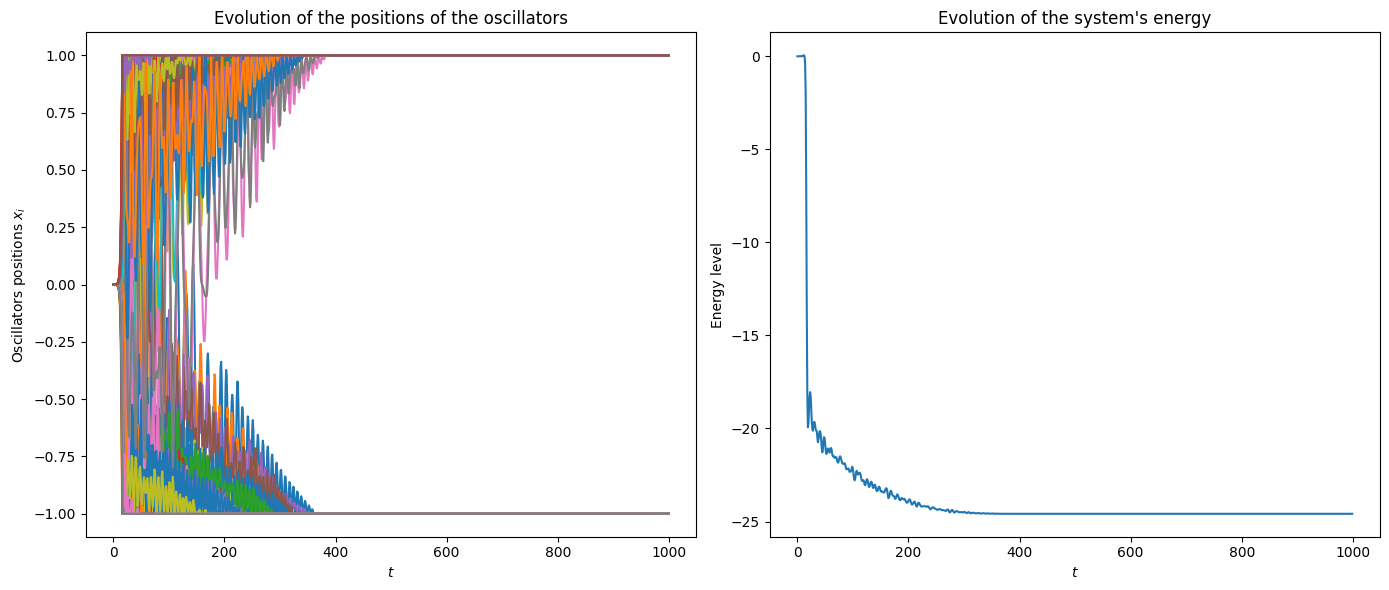

optimal portfolio  [3. 3. 3. 0. 0. 0. 3. 3. 0. 3. 3. 3. 3. 3. 0. 0. 3. 0. 0. 0. 0. 3. 0. 3.
 3. 0. 0. 3. 0. 3. 0. 0. 0. 3. 3. 0. 3. 0. 3. 0. 0. 3. 3. 3. 3. 3. 3. 0.
 0. 0. 0. 0. 0. 0. 0. 3. 3. 0. 0. 3. 0. 0. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3.
 3. 0. 3. 3. 3. 3.]


In [47]:
Optimal= Portfolio.find_optimal_portfolio(visualize=True)
print('optimal portfolio ',Optimal)

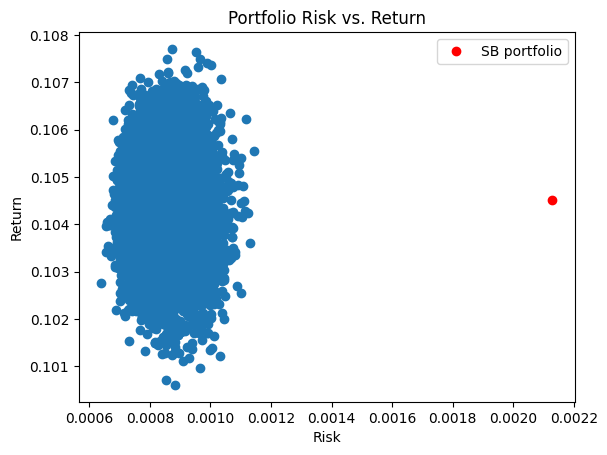

In [49]:
Portfolio.Evaluation(nb_simulations=100000)

# **Optimal Trading Trajectory**

In [11]:
Trajectory=OptimalTrajectory(N,K=N*50,T=100,sigma_t=sigma_t,mu_t=mu_t,alpha=1,c=0.01)

In [12]:
Optimal_trajectory = Trajectory.find_Trajectory()

KeyboardInterrupt: 

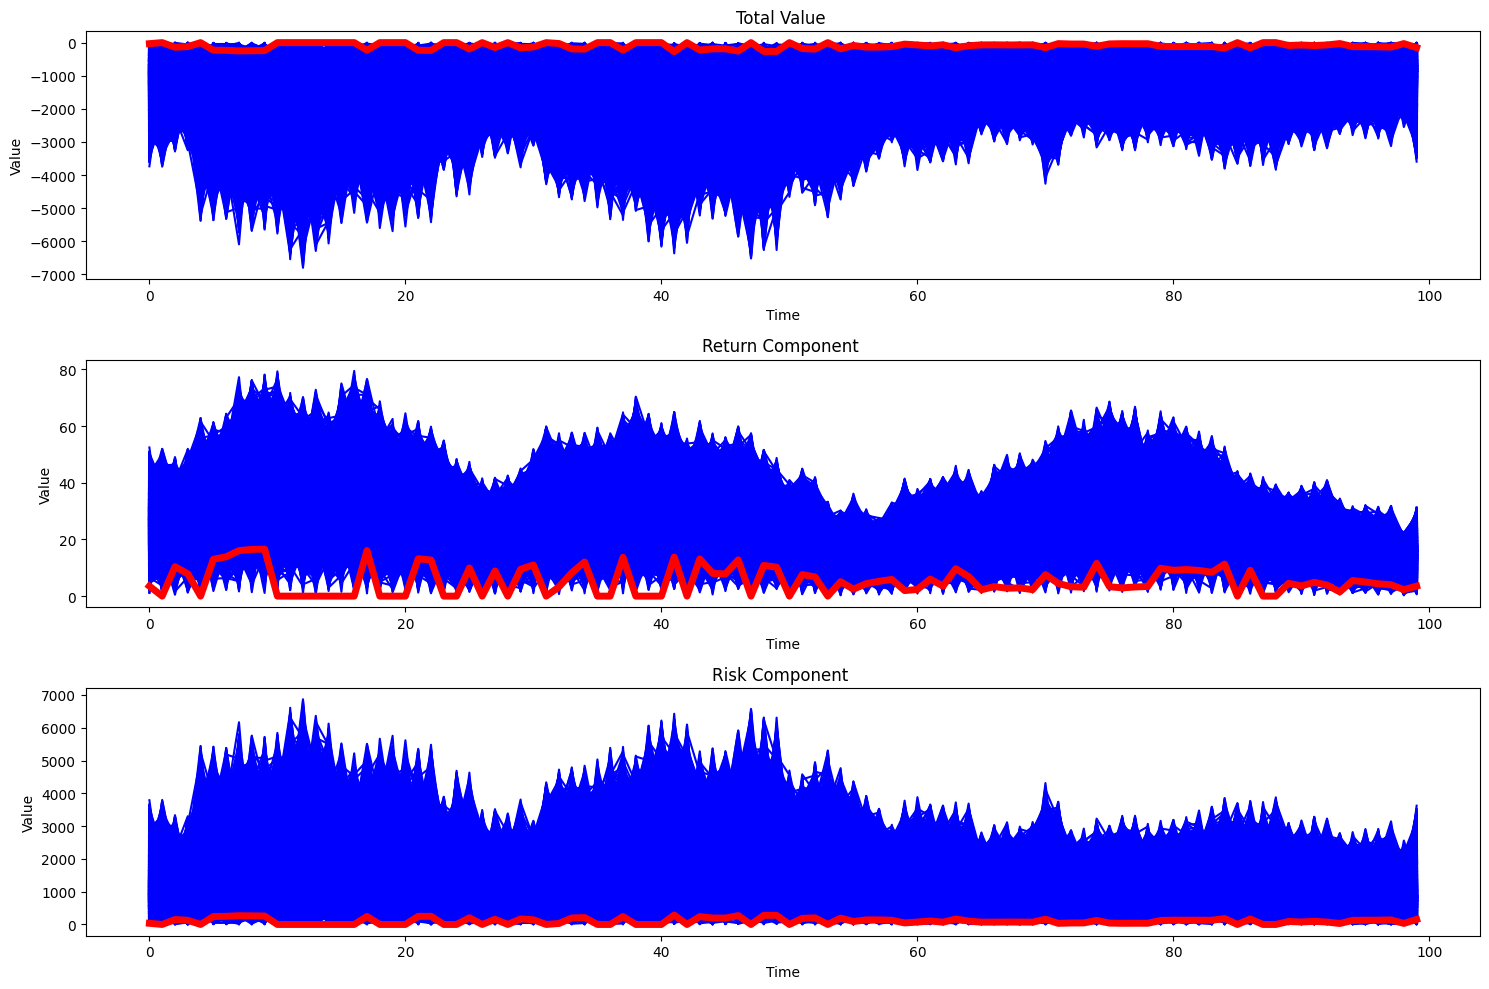

In [13]:
Trajectory.Evaluation()

# **Backtesting** 

In [19]:
import joblib
import numpy as np

# Load the data
filename = 'mu.jbl'  # Replace with your actual file name
Mu= joblib.load(filename)
Sigma = joblib.load('sigma.jbl')
# Check if the data is a list of matrices or a single matrix
if isinstance(Mu, list):
    # Convert each matrix in the list to a NumPy array
    Mu = [np.array(matrix) for matrix in Mu]
else:
    # Convert the single matrix to a NumPy array
    Mu = np.array(Mu)
if isinstance(Sigma, list):
    # Convert each matrix in the list to a NumPy array
    Sigma = [np.array(matrix) for matrix in Sigma]
else:
    # Convert the single matrix to a NumPy array
    Sigma = np.array(Sigma)

# Example output
# print(numpy_arrays)  # If the data was a list of matrices
print('Mu = ',Mu.shape)   # If the data was a single matrix
print('Sigma = ', Sigma.shape)


Mu =  (78, 1)
Sigma =  (78, 78)


In [42]:
Mu=Mu.reshape(78)

In [32]:
S 

array([[ 5.48024573e-02,  4.65673138e-03,  6.35158888e-03, ...,
         4.15936397e-03, -2.34152422e-03, -4.43286687e-03],
       [ 4.65673138e-03,  5.07050150e-02,  1.44441162e-03, ...,
         3.20439095e-03,  2.94890154e-03, -5.72572574e-05],
       [ 6.35158888e-03,  1.44441162e-03,  4.29575868e-02, ...,
         5.78112910e-03,  4.81813976e-03,  5.23735005e-03],
       ...,
       [ 4.15936397e-03,  3.20439095e-03,  5.78112910e-03, ...,
         4.71513853e-02,  2.22245079e-03,  4.38005250e-03],
       [-2.34152422e-03,  2.94890154e-03,  4.81813976e-03, ...,
         2.22245079e-03,  5.29197337e-02,  8.52111664e-03],
       [-4.43286687e-03, -5.72572574e-05,  5.23735005e-03, ...,
         4.38005250e-03,  8.52111664e-03,  4.22247245e-02]])

In [31]:
S.shape

(78, 78)

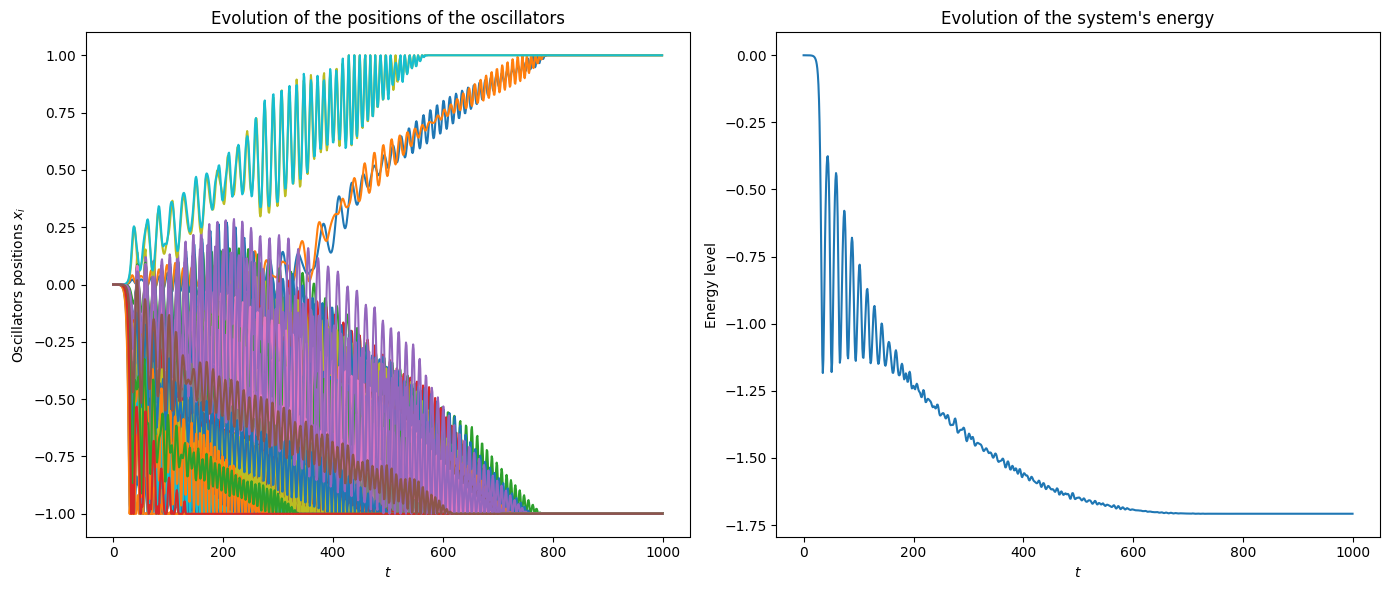

optimal portfolio  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [45]:
Portfolio= OptimalPortfolio(N=len(Mu),K=500,sigma =Sigma,mu=Mu,alpha = 1)
Optimal= Portfolio.find_optimal_portfolio(visualize=True)
print('optimal portfolio ',Optimal)